**CV2023 - Week 1**

For questions use the email 
home.florinvasluianu@outlook.com.

**Rules**

* Each session will include a set of demos used to observe some of the applications seen in the lecture. Make sure you can play with them! They will be provided on Moodle before the lab starts.  

* Each session will start with a set of questions you are supossed to prepare answers for. The set of answers has to be sent by email before the next lab starts! Use CV2023_DSWT_firstName_lastName_sessionNumber as email subject.  Some of the questions will be follow-ups on the provided demos, so don't be shy to reuse some of the codes whenever possible. 

* Each question comes with a number of base points (bp). The total number of points per session will be 10. In addition to those, 1 bp will be added for everybody attending the lab session. Questions will be asked during the lab, and additional bonus points will be given to those participating in the discussions. The final grade for the lab will be TotalNrPoints / 7. 

* For direct messaging and discussions feel free to join this [Discord server](https://discord.gg/RAJFcJCk).


EXERCISES 

**1bp** 1. Given a (h, w, 3) image convolved with a K x K filter, compute the number of flops needed to compute the convolution operation (excluding flops needed for the incrementation of indices). 

**2bp** 2. Current CPUs provide optimizations of their Instruction Set for DSP 
applications. Provide your CPU model and check its support for FMA operations.
Does your CPU implement AVX? What would be the expected speed-up with a 4xFMA ALU option, compared to the answer of the previous question?

**2bp** 3. Compare different sorting algorithms for the median filter implementation. What is the time complexity of every variation you proposed?

**2bp** 4. Provide an advantage and one disadvantage of the median filter compared to the average filter. Explain your proposals.

**2bp** 5. Using the Fast Fourier Transform, implement the operations needed to apply a low-pass filter, a band-pass filter and a high-pass filter. Provide the filtered outputs and explain the effects. What is the advantage of applying filtering in the Fourier Domain?

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**1. Image manipulation and processing**

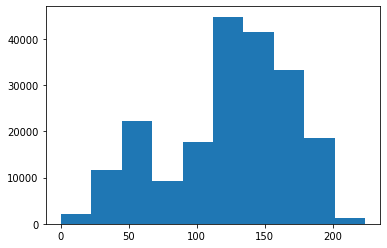

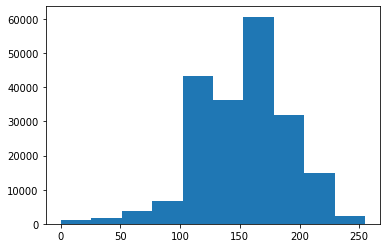

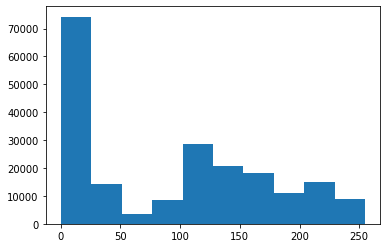

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

bender_img = cv.imread("/content/drive/MyDrive/teaching_IS_2023/resources/bender.png") 

b, g, r = cv.split(bender_img)
# thanks Felix!
plt.hist(b.flatten())
plt.show()
plt.hist(g.flatten())
plt.show()
plt.hist(r.flatten())
plt.show()

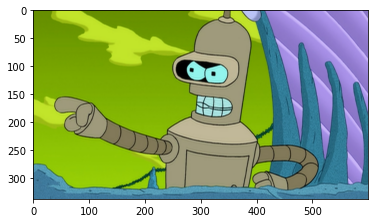

In [ ]:
plt.imshow(bender_img)

**2. Image channels manipulation**

The image comes in BGR format, so we can split the chanels to plot each channel separately

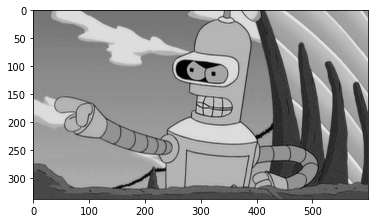

In [ ]:
b, g, r = cv.split(bender_img)
bender_img_rgb = cv.merge([r, g, b])

plt.imshow(b, 'gray')

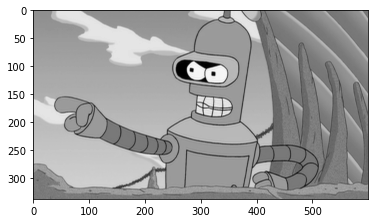

In [ ]:
plt.imshow(g, 'gray')

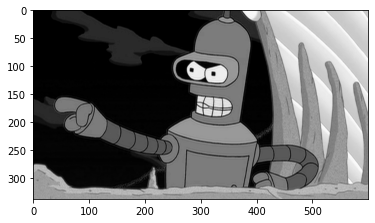

In [ ]:
plt.imshow(r, 'gray')

**3. Transformation between different representations**

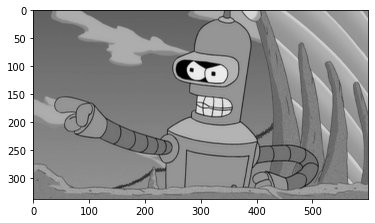

In [ ]:
grayImg = cv.cvtColor(bender_img, cv.COLOR_BGR2GRAY) # transform BGR image to gray scale image
plt.imshow(grayImg,cmap='gray')


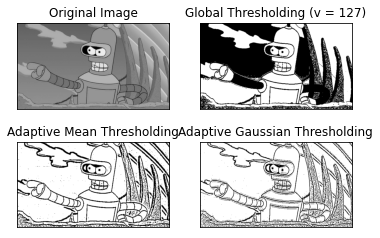

In [ ]:
#Transform image from multiple level of gray to binary image
ret,th1 = cv.threshold(grayImg,127,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(grayImg,255,cv.ADAPTIVE_THRESH_MEAN_C,\
            cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(grayImg,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,11,2)
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [grayImg, th1, th2, th3]
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
plt.show()

**4. Image manipulation**

<class 'numpy.ndarray'>


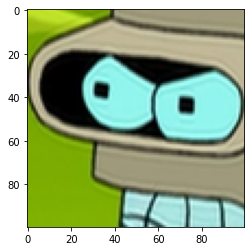

In [ ]:
#Crop a piece of image
print(type(bender_img))
cropped = bender_img[70:170, 250:350]
plt.imshow(cropped)

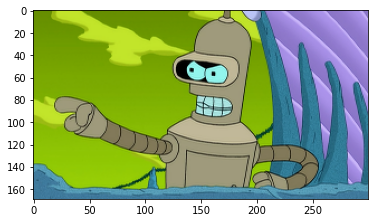

In [ ]:
dim = (300,169)
# Resize image to dim using cubic interpolation
res = cv.resize(bender_img, dim, interpolation=cv.INTER_CUBIC) 
plt.imshow(res)

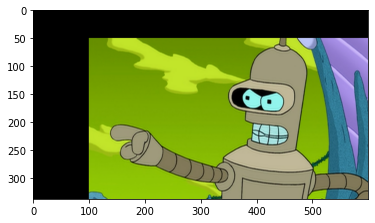

In [ ]:
rows,cols = bender_img.shape[:2] # Getting the shape of the image
M = np.float32([[1,0,100],[0,1,50]]) # Parameters of the translation<class 'numpy.ndarray'>
dst = cv.warpAffine(bender_img,M,(cols,rows)) # Translation of a image 
plt.imshow(dst)

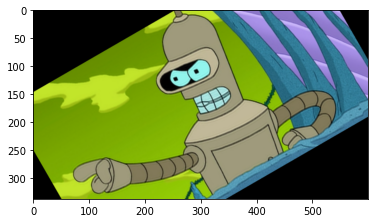

In [ ]:
M = cv.getRotationMatrix2D(((cols-1)/2.0,(rows-1)/2.0),30,1) # Angle of the rotation with respect to center of image
dst = cv.warpAffine(bender_img,M,(cols,rows)) # Rotate the image
plt.imshow(dst)

**5. Pyramid representation of images**

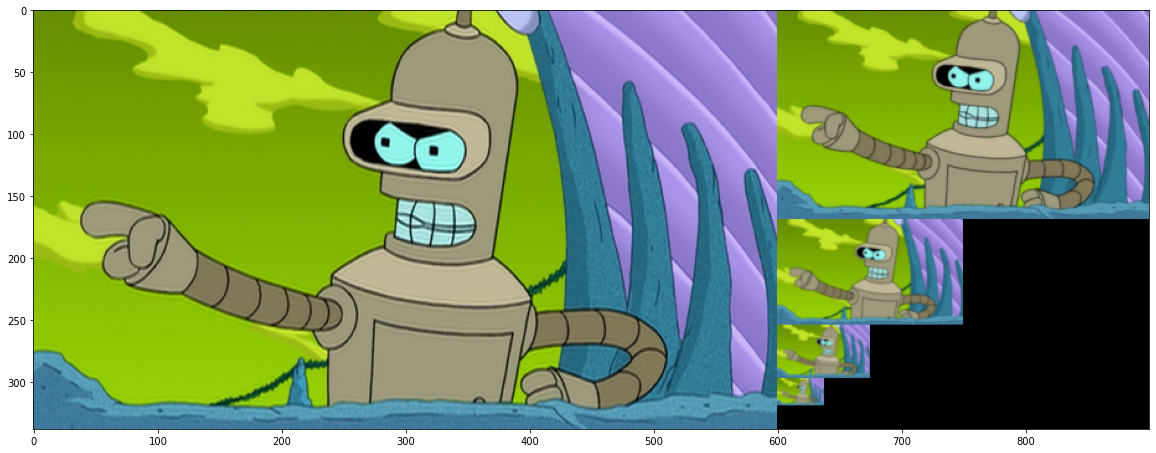

In [ ]:
layer = bender_img.copy() 

rows, cols, dim = layer.shape
composite_image = np.zeros((rows, cols + cols // 2, 3), dtype=np.uint8)

composite_image[:rows, :cols, :] = layer
i_row = 0

for i in range(4): 
    # using pyrDown() function 
    layer = cv.pyrDown(layer)
    n_rows, n_cols = layer.shape[:2] 
    composite_image[i_row:i_row + n_rows, cols:cols + n_cols] = layer
    i_row += n_rows

fig, ax = plt.subplots(figsize=(20, 20))
ax.imshow(composite_image)
plt.show()

**6. Contrast enhancement**


Text(0.5, 1.0, 'Enhanced image')

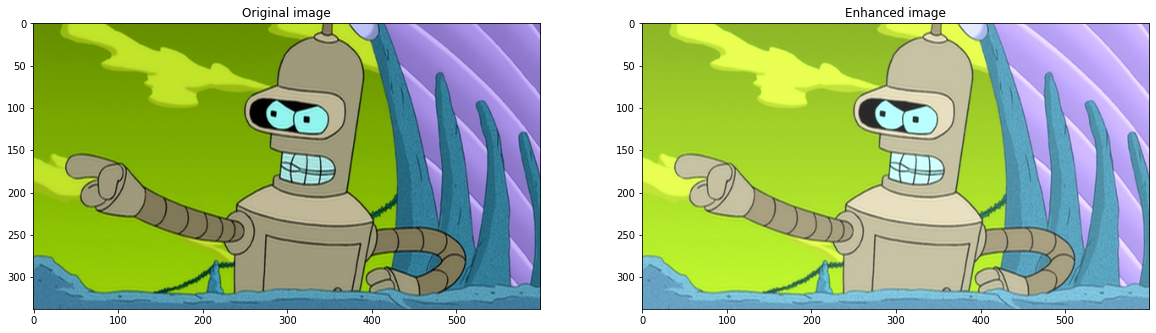

In [ ]:
# Contrast/brightness change
img = bender_img.copy() 
new_image = np.zeros(img.shape, img.dtype)
alpha = 1.0 # Simple contrast control value [1.0-3.0]
beta = 40    # Simple brightness  value [0-100]

for y in range(img.shape[0]):
    for x in range(img.shape[1]):
        for c in range(img.shape[2]):
            new_image[y,x,c] = np.clip(alpha*img[y,x,c] + beta, 0, 255)

fig, ax = plt.subplots(1,2,figsize=(20, 20))
ax[0].imshow(img)
ax[0].set_title('Original image')
ax[1].imshow(new_image)
ax[1].set_title('Enhanced image')

**7. Gamma correction**


Text(0.5, 1.0, 'Gamma correction')

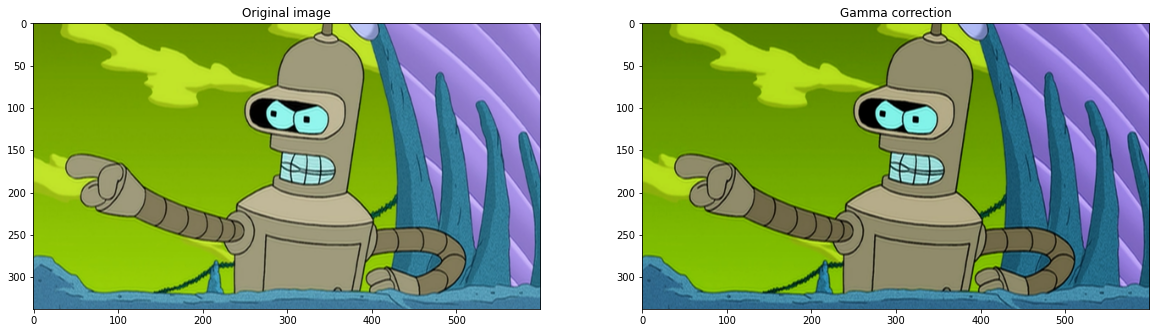

In [ ]:
lookUpTable = np.empty((1,256), np.uint8)
gamma = 1.2
for i in range(256):
  lookUpTable[0,i] = np.clip(pow(i / 255.0, gamma) * 255.0, 0, 255)
res = cv.LUT(img, lookUpTable)

fig, ax = plt.subplots(1,2,figsize=(20, 20))
ax[0].imshow(img)
ax[0].set_title('Original image')
ax[1].imshow(res)
ax[1].set_title('Gamma correction')

**8. Image histogram**

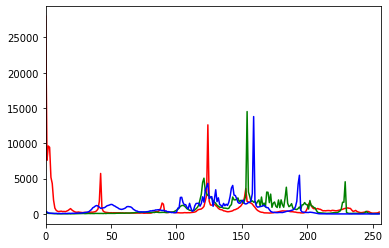

In [ ]:
color = ('r','g','b')
for i,col in enumerate(color):
    histr = cv.calcHist([bender_img_rgb],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

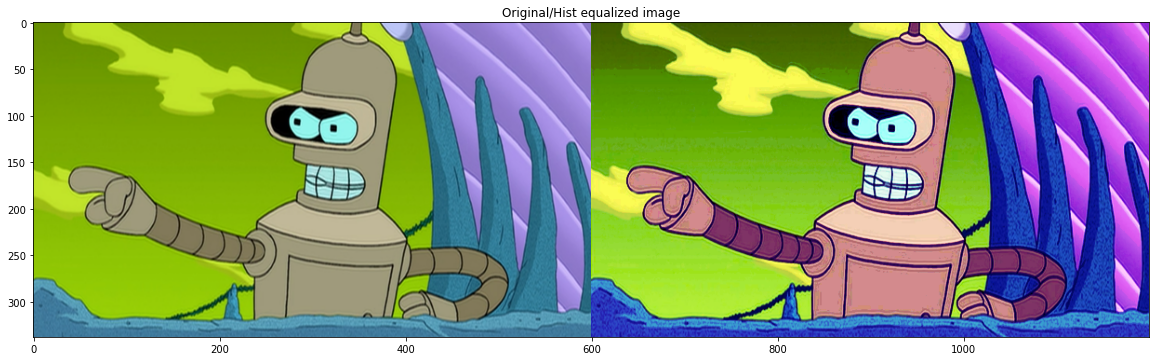

In [ ]:
# Histogram equalize
d1 = cv.equalizeHist(img[:,:,0])
d2 = cv.equalizeHist(img[:,:,1])
d3 = cv.equalizeHist(img[:,:,2])
equ = cv.merge([d1,d2,d3])
res = np.hstack((img,equ)) 
fig, ax = plt.subplots(figsize=(20, 20))
ax.imshow(res)
ax.set_title('Original/Hist equalized image')
plt.show()

**9. Histogram matching**

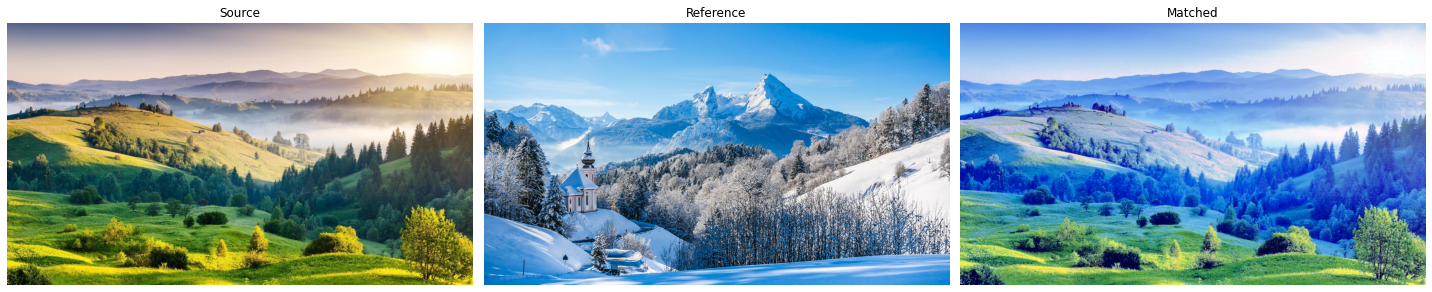

In [ ]:
from skimage import data
from skimage import exposure
from skimage.exposure import match_histograms #loading function for histogram matching

img = cv.imread("/content/drive/MyDrive/teaching_IS_2023/resources/a.jpg")
reference = cv.imread("/content/drive/MyDrive/teaching_IS_2023/resources/b.jpg")

b,g,r = cv.split(reference)       # get blue,green,red channels
reference = cv.merge([r,g,b])     # merge channels to get the RGB imag
b,g,r = cv.split(img)       
img = cv.merge([r,g,b]) 

matched = match_histograms(img, reference, multichannel=True)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20, 20),
                                    sharex=True, sharey=True)
for aa in (ax1, ax2, ax3):
    aa.set_axis_off()

ax1.imshow(img)
ax1.set_title('Source')
ax2.imshow(reference)
ax2.set_title('Reference')
ax3.imshow(matched)
ax3.set_title('Matched')

plt.tight_layout()
plt.show()

**10. Image filtering - 'convolution'**

In [ ]:
def cumsum_prod(a, b):
  return np.sum(a * b)


def generic_convolution(input_image, correlation_filter, agg_function):
  h, w = input_image.shape
  h_c, w_c = correlation_filter.shape

  d_h = h_c // 2
  d_w = w_c // 2

  # padding is needed such that in your iterative procedure you don't have negative indices or indices 
  # outside the image
  oper_image = np.zeros((h + 2 * d_h, w + 2 * d_w))
  # insert the input image in the center of the padded image, such that you will
  # have a 0-border with a height h_c // 2 and a width w_c // 2
  oper_image[d_h:(h + d_h), d_w:(w + d_w)] = input_image
  output_img = np.zeros((h, w))

  for i in range(h):
    for j in range(w):
      # compute the values of the index of the corners of your local patch
      l_i = i 
      l_j = j
      r_i = i + 2 * (h_c // 2)
      r_j = j + 2 * (w_c // 2)

      # extract the patch and apply the agg function
      # the aggregation here is the sum of the elementwise multiplication between the filter and the local patch
      patch = oper_image[l_i: r_i + 1, l_j: r_j + 1]
      output_img[i, j] = agg_function(patch, correlation_filter)

  return output_img

  

In [ ]:
plt.rcParams["figure.figsize"] = (25, 5)

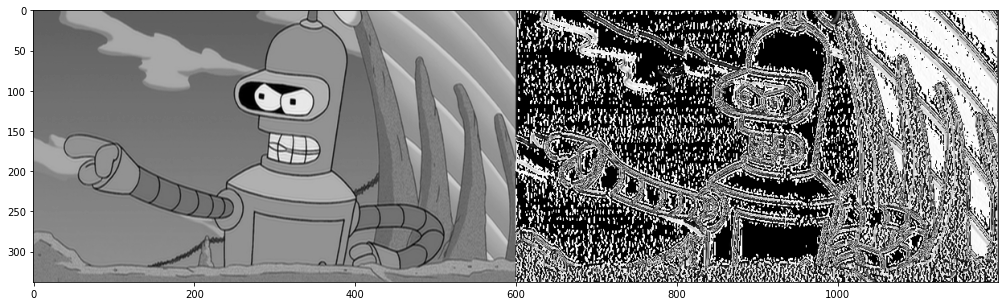

In [ ]:
bender_img = cv.imread("/content/drive/MyDrive/teaching_IS_2023/resources/bender.png")
bender_img_gray = cv.cvtColor(bender_img, cv.COLOR_BGR2GRAY)

sobel_filter = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])

matrix_filt_image = generic_convolution(bender_img_gray, sobel_filter, cumsum_prod)
h, w = matrix_filt_image.shape

out_img = np.zeros((h, 2*w), dtype=np.uint8)
out_img[:, :w] = bender_img_gray
out_img[:, w:] = matrix_filt_image
plt.imshow(out_img, cmap="gray")

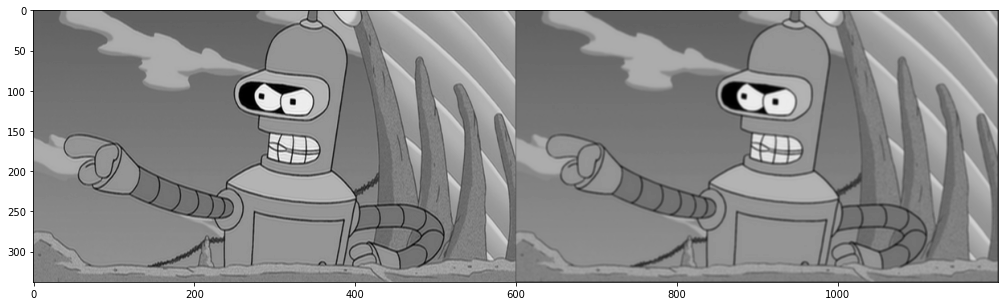

In [ ]:
avg_filter = 1 / 9 * np.ones((3, 3))
smooth_image = generic_convolution(bender_img_gray, avg_filter, cumsum_prod)

out_img = np.zeros((h, 2*w), dtype=np.uint8)
out_img[:, :w] = bender_img_gray
out_img[:, w:] = smooth_image
plt.imshow(out_img, cmap="gray")


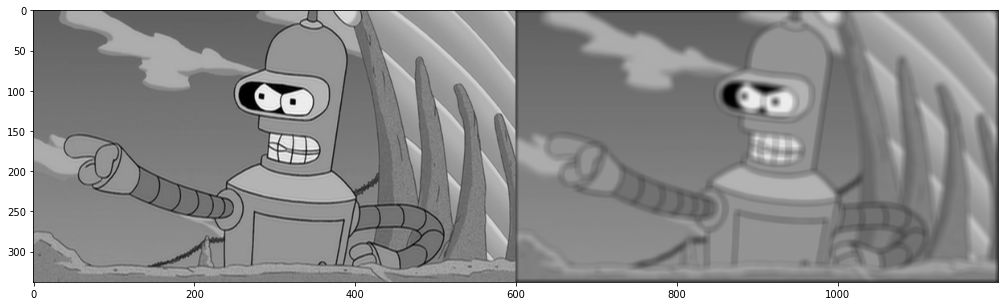

In [ ]:
avg_filter = 1 / 81 * np.ones((9, 9))
smooth_image = generic_convolution(bender_img_gray, avg_filter, cumsum_prod)

out_img = np.zeros((h, 2*w), dtype=np.uint8)
out_img[:, :w] = bender_img_gray
out_img[:, w:] = smooth_image
plt.imshow(out_img, cmap="gray")

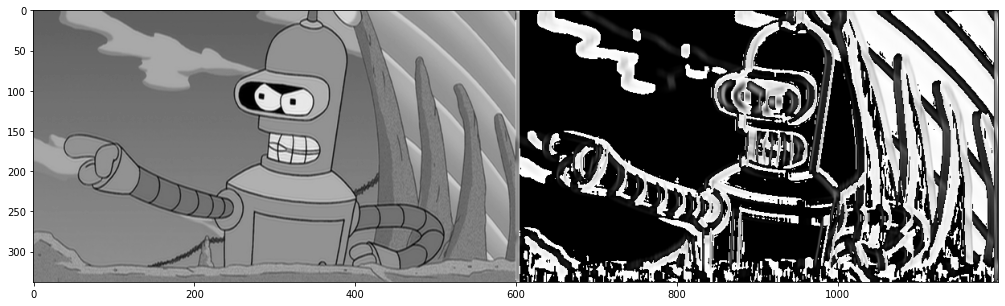

In [ ]:
filt_image = generic_convolution(smooth_image, sobel_filter, cumsum_prod)

out_img = np.zeros((h, 2*w), dtype=np.uint8)
out_img[:, :w] = bender_img_gray
out_img[:, w:] = filt_image
plt.imshow(out_img, cmap="gray")

**11. Image Gradients**

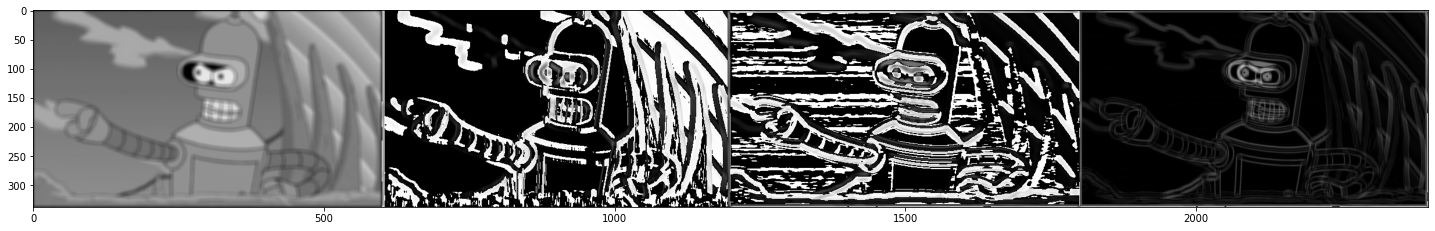

In [ ]:
prewitt_x = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
prewitt_y = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])

gx = generic_convolution(smooth_image, prewitt_x, cumsum_prod)
gy = generic_convolution(smooth_image, prewitt_y, cumsum_prod)
G = np.sqrt(gx ** 2 + gy ** 2)

h, w = smooth_image.shape
out_image = np.zeros((h, 4 * w), dtype=np.uint8)
out_image[:, :w] = smooth_image
out_image[:, w:2*w] = gx
out_image[:, 2*w:3*w] = gy
out_image[:, 3*w:] = G
plt.imshow(out_image, cmap='gray')


**12. Image Denoising**

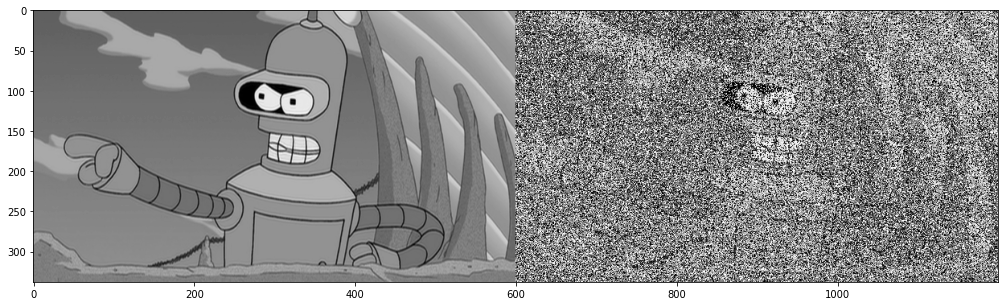

In [ ]:
# the 'salt and pepper' noise 
h, w = bender_img_gray.shape
noise  = 2 * 255 *(np.random.rand(h, w) - 0.5) # to -255, 255
noise = np.where(np.abs(noise) < 128.0, 0, noise)
noise = np.where(noise <= -128.0, -255.0, noise)
noise = np.where(noise >= 128.0, 255.0, noise)


bender_img_noisy = np.clip(bender_img_gray + noise, 0, 255)

out_img = np.zeros((h, 2*w), dtype=np.uint8)
out_img[:, :w] = bender_img_gray
out_img[:, w:] = bender_img_noisy

plt.imshow(out_img, cmap="gray")

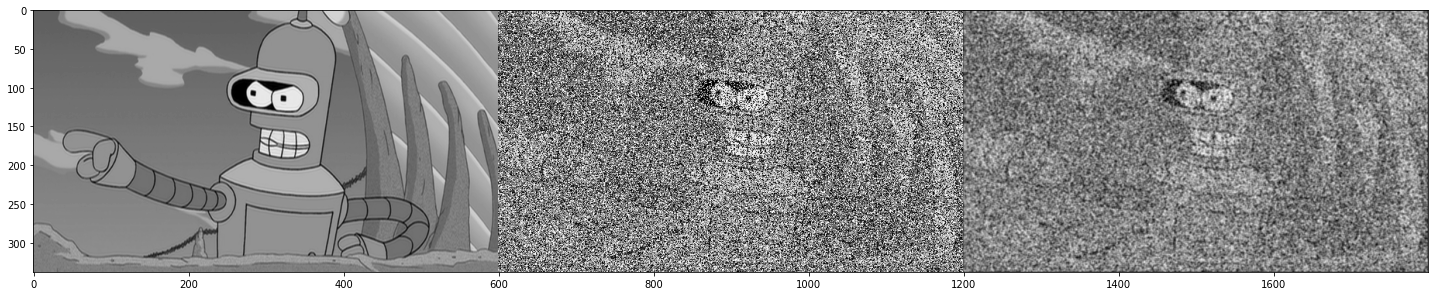

In [ ]:
avg_filter = 1/9 * np.ones((3, 3))
filt_image = generic_convolution(bender_img_noisy, avg_filter, cumsum_prod)

out_img = np.zeros((h, 3*w), dtype=np.uint8)
out_img[:, :w] = bender_img_gray
out_img[:, w:2*w] = bender_img_noisy
out_img[:, 2*w:] = filt_image
plt.imshow(out_img, cmap="gray")

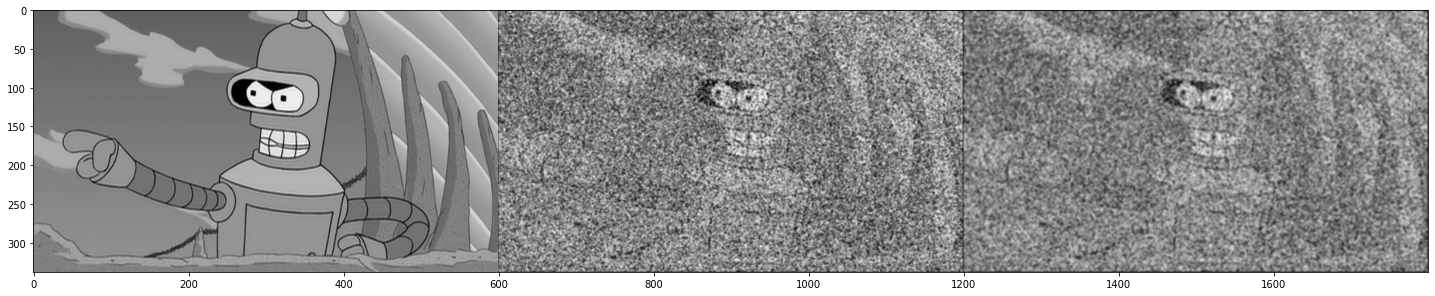

In [ ]:
filt_image_2 = generic_convolution(filt_image, avg_filter, cumsum_prod)

out_img = np.zeros((h, 3*w), dtype=np.uint8)
out_img[:, :w] = bender_img_gray
out_img[:, w:2*w] = filt_image
out_img[:, 2*w:] = filt_image_2
plt.imshow(out_img, cmap="gray")

In [ ]:
def get_median(a, b=None):
  h, w  = a.shape
  a_flat = a.flatten()
  a_sorted = np.sort(a_flat)
  return a_sorted[h * w // 2]

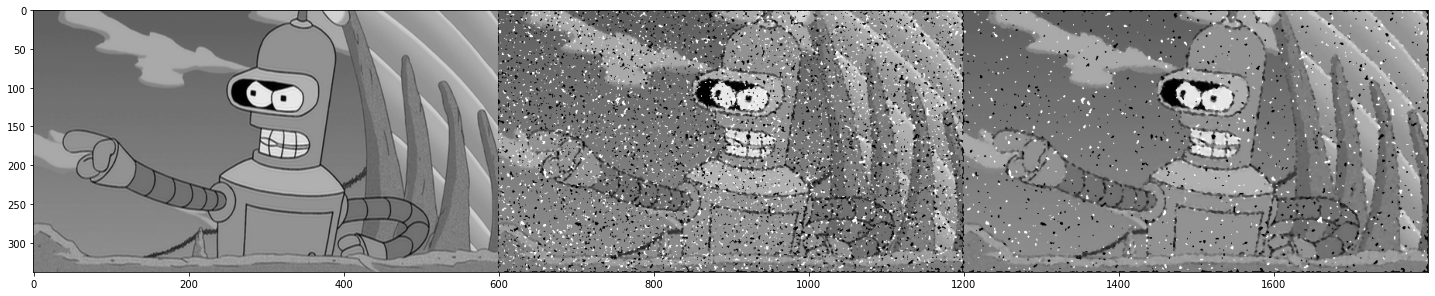

In [ ]:
# send a 3x3 matrix of zero values just to use the convolution operation
# the filter kernel values are not used in the median filter
median_filt_img = generic_convolution(bender_img_noisy, np.zeros((3, 3)), get_median)

out_img = np.zeros((h, 3*w), dtype=np.uint8)
out_img[:, :w] = bender_img_gray
out_img[:, w:2*w] = median_filt_img
out_img[:, 2*w:] = generic_convolution(median_filt_img, np.zeros((3, 3)), get_median)
plt.imshow(out_img, cmap="gray")

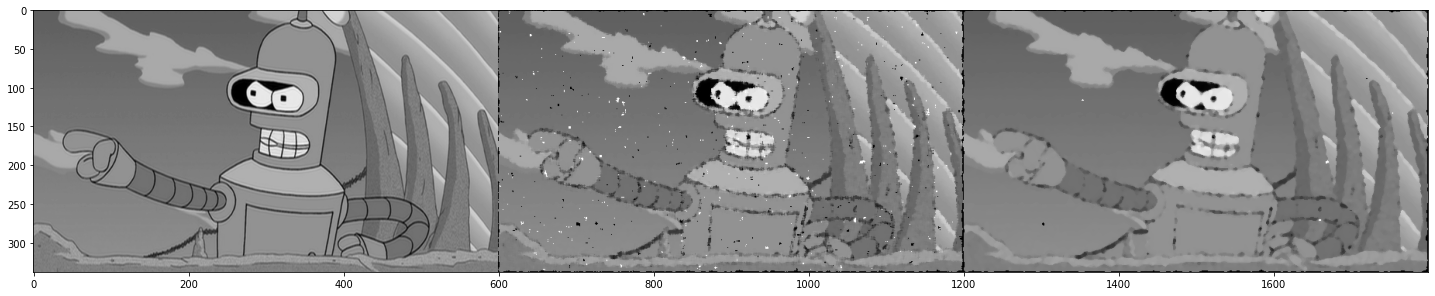

In [ ]:
median_filt_img = generic_convolution(bender_img_noisy, np.zeros((5, 5)), get_median)

out_img = np.zeros((h, 3*w), dtype=np.uint8)
out_img[:, :w] = bender_img_gray
out_img[:, w:2*w] = median_filt_img
out_img[:, 2*w:] = generic_convolution(median_filt_img, np.zeros((5, 5)), get_median)
plt.imshow(out_img, cmap="gray")

Additional resources:

[OpenCV package
](https://docs.opencv.org/3.4/d9/df8/tutorial_root.html)

[Pillow package](https://pillow.readthedocs.io/en/stable/)

[Scikit image package](https://scikit-image.org/) 

[Linear Algebra package](https://numpy.org/) 

References:

R.C. Gonzalez, Digital Image Processing- 3rd Edition, editura Prentice Hall, New Jersey, SUA, pag. 568-572, 2008

Nixon M.S., Aguado A.S., Feature Extraction and Image Processing for Computer Vision (3ed., AP, 2012)
